In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

### Import mock data module and setup the configuration 

In [11]:
import clmm.mock_data as mock

## Mock data generation requires a config dictionary

In [12]:
config={}
config['cluster_m'] = 1.e15
config['cluster_z'] = 0.3
config['src_z'] = 0.8
config['concentration'] = 4
config['cosmo'] = 'WMAP7-ML'
config['ngals'] = 10000
config['mdef'] = '200c'

ideal_data = mock.MockData(config=config)
noisy_data = mock.MockData(config=config)

### Generate the mock catalog from the configuration
* Ideal data
* Noisy data, including shape noise and redshift error

In [13]:
ideal_data.generate()
noisy_data.generate(is_shapenoise=True, is_zerr=True)

In [14]:
ideal_data.catalog

id,ra,dec,gamma1,gamma2,z
int64,float64,float64,float64,float64,float64
0,0.22229783067,-0.136796055602,-0.00398336307623,-0.00789051857411,0.8
1,0.155922740062,-0.25563956524,0.00334372838078,-0.00649522920953,0.8
2,-0.128151059278,-0.252624337966,0.00466310622072,0.0063702677062,0.8
3,-0.025337931365,-0.0643041543786,0.030584455732,0.0285325557326,0.8
4,-0.309800086125,-0.182037922764,-0.0027423147836,0.00492228052874,0.8
5,-0.309112863719,-0.172467667019,-0.00302409519814,0.00489989676827,0.8
6,-0.235491369972,-0.289266612636,0.00108264421412,0.00522694136732,0.8
7,0.212040369099,0.0221039042058,-0.0113554936229,0.00239349025591,0.8
8,-0.196199898522,0.279653999882,0.00206202776301,-0.00569800729889,0.8


#### If redshift error is requested, the table also includes a gaussian pdz and corresponding bins

In [15]:
noisy_data.catalog

id,ra,dec,gamma1,gamma2,z,z_pdf [21],z_bins [21]
int64,float64,float64,float64,float64,float64,float64,float64
0,-0.321694350478,-0.345450890553,0.000578962916806,0.00811908169959,0.8,1.21517656996e-07 .. 1.21517656996e-07,0.5 .. 1.1
1,-0.285857533476,-0.213917868169,-0.00108716710291,0.00369810903918,0.8,1.21517656996e-07 .. 1.21517656996e-07,0.5 .. 1.1
2,0.281652523536,-0.267147937149,-0.000417486647861,-0.00789256635045,0.8,1.21517656996e-07 .. 1.21517656996e-07,0.5 .. 1.1
3,0.230919221089,0.110567236538,-0.00831472967508,0.0103308945229,0.8,1.21517656996e-07 .. 1.21517656996e-07,0.5 .. 1.1
4,-0.251646033493,-0.182446288799,-0.000165895170253,0.000507110104629,0.8,1.21517656996e-07 .. 1.21517656996e-07,0.5 .. 1.1
5,0.00725104806794,-0.0176168856655,0.0743591310992,-0.0736970527257,0.8,1.21517656996e-07 .. 1.21517656996e-07,0.5 .. 1.1
6,-0.201419835861,-0.291540697832,0.00137264877792,0.00362871919495,0.8,1.21517656996e-07 .. 1.21517656996e-07,0.5 .. 1.1
7,0.239132423973,-0.229901693426,-0.000274957470349,-0.00698289718397,0.8,1.21517656996e-07 .. 1.21517656996e-07,0.5 .. 1.1
8,0.191418480776,-0.194432531923,0.000116929061262,-0.00748402092667,0.8,1.21517656996e-07 .. 1.21517656996e-07,0.5 .. 1.1


### Compute and plot shear profile

In [16]:
from clmm import ShearAzimuthalAverager

/home/babyostrich/anaconda3/lib/python3.5/site-packages/astropy/table/row.py:56: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other


read g1, g2 directly
read g1, g2 directly


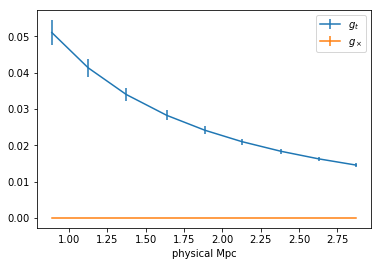

In [17]:
cl_dict = {'z':config['cluster_z'], 'ra':0.0, 'dec': 0.0}
saa_ideal = ShearAzimuthalAverager(cl_dict,ideal_data.catalog)
saa_noisy = ShearAzimuthalAverager(cl_dict,noisy_data.catalog)
saa_ideal.compute_shear()
saa_noisy.compute_shear()
saa_ideal.make_shear_profile()
saa_noisy.make_shear_profile()

saa_ideal.plot_profile()


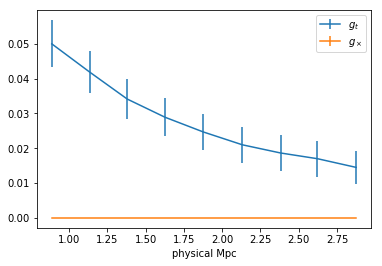

In [18]:
saa_noisy.plot_profile()